In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("HollywoodMovies.csv")

#mostro le prime righe del dataset per capire la struttura
df.head()

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.1,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.6,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.5,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.7,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.1,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie             970 non-null    object 
 1   LeadStudio        961 non-null    object 
 2   RottenTomatoes    913 non-null    float64
 3   AudienceScore     907 non-null    float64
 4   Story             641 non-null    object 
 5   Genre             691 non-null    object 
 6   TheatersOpenWeek  949 non-null    float64
 7   OpeningWeekend    969 non-null    float64
 8   BOAvgOpenWeekend  945 non-null    float64
 9   DomesticGross     970 non-null    float64
 10  ForeignGross      876 non-null    float64
 11  WorldGross        914 non-null    float64
 12  Budget            897 non-null    float64
 13  Profitability     896 non-null    float64
 14  OpenProfit        895 non-null    float64
 15  Year              970 non-null    int64  
dtypes: float64(11), int64(1), object(4)
memory u

**1. Evoluzione degli incassi medi nel tempo**

Come prima analisi calcolo la media degli incassi per anno e ne osservo la variazione nel tempo

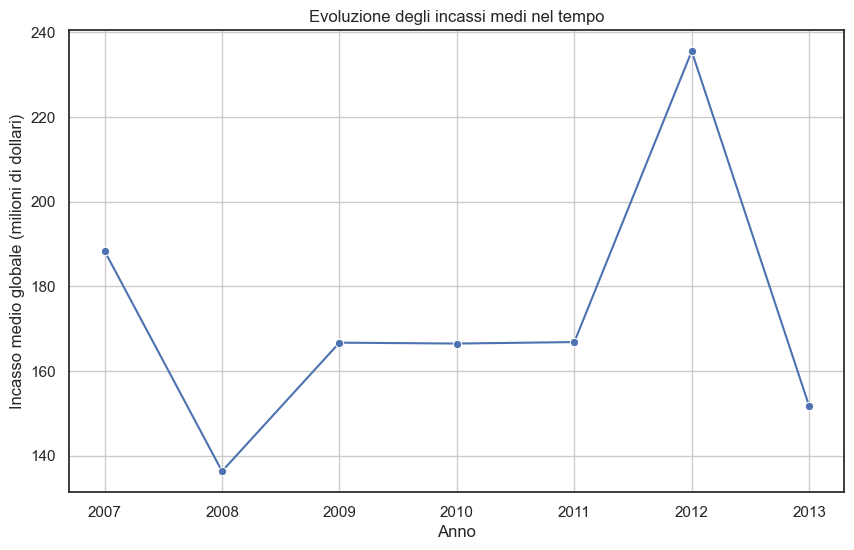

In [8]:
# Imposto lo stile di Seaborn
sns.set(style="white")

df_yearly = df.groupby("Year")["WorldGross"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="WorldGross", data=df_yearly, marker="o")
plt.title("Evoluzione degli incassi medi nel tempo")
plt.xlabel("Anno")
plt.ylabel("Incasso medio globale (milioni di dollari)")
plt.grid(True)

plt.show()

**2. Numero di film usciti per anno divisi per genere**

Come seconda analisi creo un grafico a barre che rappresenti i film usciti per anno e per genere

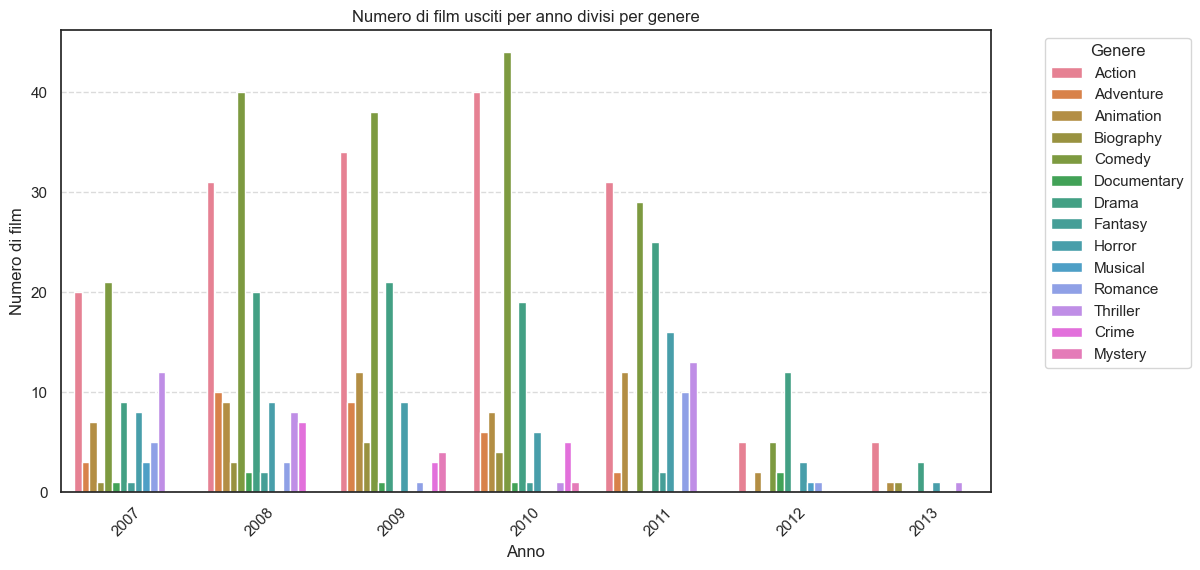

In [9]:
df_conteggio = df.groupby(["Year", "Genre"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_conteggio, x="Year", y="Count", hue="Genre", estimator=sum)

# Personalizzare il grafico
plt.title("Numero di film usciti per anno divisi per genere")
plt.xlabel("Anno")
plt.ylabel("Numero di film")
plt.xticks(rotation=45)
plt.legend(title="Genere", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**3. Film Disney del 2008 per genere**

Come terza analisi ho esplorato il dataset per capire in quale anno la Disney avesse prodotto più film, successivamente ho creato un grafico a torta per genere

In [12]:
disney_movies = df[df["LeadStudio"] == "Disney"]
disney_count = disney_movies["Year"].value_counts().reset_index()
disney_count.columns = ["Year", "Number of Movies"]
disney_count

,Year,Number of Movies
0,2008,9
1,2011,9
2,2007,7
3,2009,7
4,2010,7


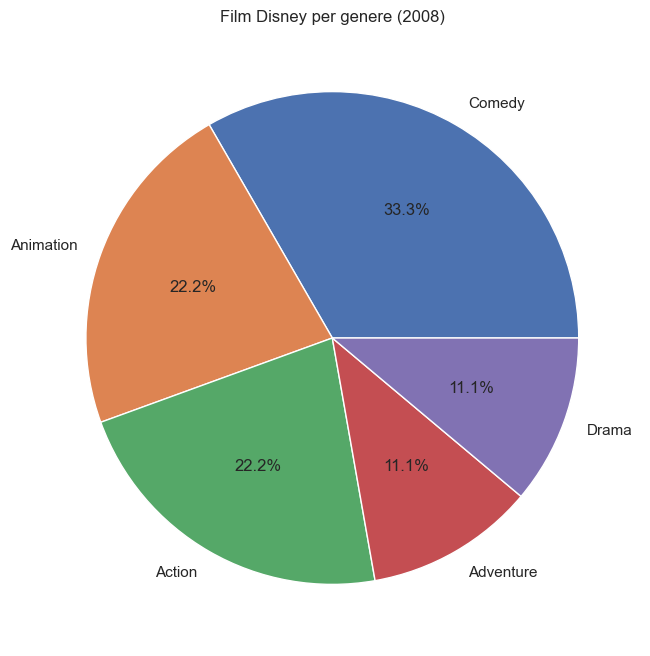

In [18]:
disney_2008 = disney_movies[disney_movies["Year"] == 2008]
genre_counts = disney_2008["Genre"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title("Film Disney per genere (2008)")

# Mostrare il grafico
plt.show()
